In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train = "/dfs/scratch1/gmachi/datasets/WikiSection/wikisection_en_disease_train.json"
with open(train, 'r') as f:
  train_data = json.load(f)

In [4]:
print(len(train_data), "documents")
print("="*60)
print()


for key, val in train_data[0].items():
    print(key.upper())
    print(val[0:30])
    if key == "annotations":
        print(train_data[0]["annotations"][0].keys())
    print()
    


2513 documents

ID
https://en.wikipedia.org/wiki/

TYPE
disease

TITLE
Pneumonic plague

ABSTRACT
Pneumonic plague is a severe l

TEXT
The most apparent symptom of p

ANNOTATIONS
[{'class': 'SectionAnnotation', 'begin': 0, 'length': 715, 'sectionHeading': 'Signs and symptoms', 'sectionLabel': 'disease.symptom'}, {'class': 'SectionAnnotation', 'begin': 715, 'length': 503, 'sectionHeading': 'Cause | Spread', 'sectionLabel': 'disease.cause'}, {'class': 'SectionAnnotation', 'begin': 1218, 'length': 522, 'sectionHeading': 'Treatment', 'sectionLabel': 'disease.treatment'}, {'class': 'SectionAnnotation', 'begin': 1740, 'length': 361, 'sectionHeading': 'Epidemiology', 'sectionLabel': 'disease.epidemiology'}, {'class': 'SectionAnnotation', 'begin': 2101, 'length': 479, 'sectionHeading': 'Epidemiology | India', 'sectionLabel': 'disease.epidemiology'}, {'class': 'SectionAnnotation', 'begin': 2580, 'length': 1821, 'sectionHeading': 'Epidemiology | China', 'sectionLabel': 'disease.epidemiology'}, {

In [5]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

# #Our sentences we like to encode
# sentences = ['This framework generates embeddings for each input sentence',
#     'Sentences are passed as a list of string.',
#     'The quick brown fox jumps over the lazy dog.']

# #Sentences are encoded by calling model.encode()
# embeddings = model.encode(sentences)

# #Print the embeddings
# for sentence, embedding in zip(sentences, embeddings):
#     print("Sentence:", sentence)
#     print("Embedding:", embedding)
#     print("")

/dfs/scratch1/gmachi/miniconda3/envs/kkenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
all_labs = []
all_sizes = []
for i in range(len(train_data)):
    text = train_data[i]["text"]
    annots = train_data[i]["annotations"]
    labs = []

    for annot in annots:
        idx = [int(annot["begin"]), int(annot["length"])]
        chunk = text[idx[0]:idx[1]]
        all_sizes.append(len(chunk))
        lab = annot["sectionLabel"]
        labs.append(lab)

    all_labs.append(list(set(labs)))
    


1183 / 2513


(array([1.7031e+04, 1.1090e+03, 6.3500e+02, 3.4100e+02, 1.9500e+02,
        9.3000e+01, 4.8000e+01, 3.1000e+01, 2.0000e+01, 1.0000e+01,
        6.0000e+00, 7.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0. ,  444.7,  889.4, 1334.1, 1778.8, 2223.5, 2668.2, 3112.9,
        3557.6, 4002.3, 4447. , 4891.7, 5336.4, 5781.1, 6225.8, 6670.5,
        7115.2, 7559.9, 8004.6, 8449.3, 8894. ]),
 <BarContainer object of 20 artists>)

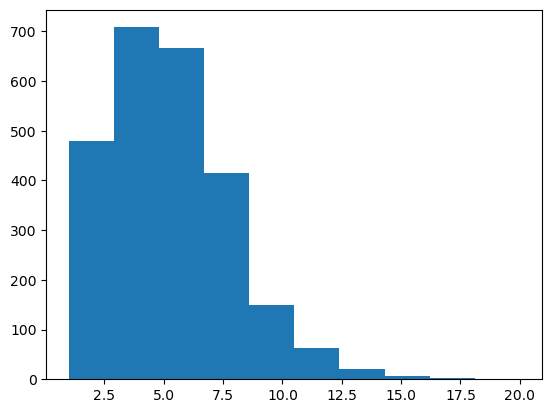

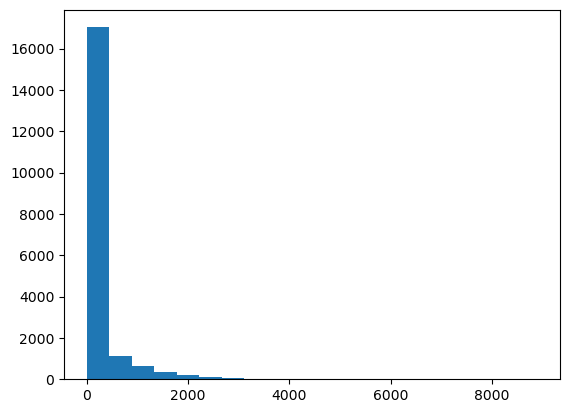

In [56]:
target = "disease.cause"
# other options - see wikisection repo

presence = [1 if target in labs else 0 for labs in all_labs]
print(np.sum(presence),"/", len(presence))

sent_counts = [len(labs) for labs in all_labs]
plt.figure()
plt.hist(sent_counts)

plt.figure()
plt.hist(all_sizes, bins=20)

# Try embedding a section

In [7]:
i = 0
text = data[i]["text"]
annots = data[i]["annotations"]
labs = []
embeds = []

for annot in annots:
    idx = [int(annot["begin"]), int(annot["length"])]
    chunk = text[idx[0]:idx[1]]
    embedding = model.encode(chunk)
    lab = annot["sectionLabel"]
    labs.append(lab)
    embeds.append(embedding)

NameError: name 'data' is not defined

In [35]:
labs

['disease.symptom',
 'disease.cause',
 'disease.treatment',
 'disease.epidemiology',
 'disease.epidemiology',
 'disease.epidemiology',
 'disease.epidemiology',
 'disease.epidemiology',
 'disease.epidemiology']

In [38]:
embeds[0].shape

(384,)

In [8]:
test = "/dfs/scratch1/gmachi/datasets/WikiSection/wikisection_en_disease_test.json"
with open(test, 'r') as f:
    test_data = json.load(f)

In [9]:
test_data

[{'id': 'https://en.wikipedia.org/wiki/Tarsal_tunnel_syndrome',
  'type': 'disease',
  'title': 'Tarsal tunnel syndrome',
  'abstract': 'Tarsal tunnel syndrome (TTS), also known as posterior tibial neuralgia, is a compression neuropathy and painful foot condition in which the tibial nerve is compressed as it travels through the tarsal tunnel. This tunnel is found along the inner leg behind the medial malleolus (bump on the inside of the ankle). The posterior tibial artery, tibial nerve, and tendons of the tibialis posterior, flexor digitorum longus, and flexor hallucis longus muscles travel in a bundle through the tarsal tunnel. Inside the tunnel, the nerve splits into three different segments. One nerve (calcaneal) continues to the heel, the other two (medial and lateral plantar nerves) continue on to the bottom of the foot. The tarsal tunnel is delineated by bone on the inside and the flexor retinaculum on the outside.\nPatients with TTS typically complain of numbness in the foot rad

In [10]:
print(len(test_data), "documents")

718 documents
